# YOLOv8 - results
(perpendicular BB, rotated BB, added altituded information)

In [6]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
from ultralytics import YOLO


RESULTS_PATH = "runs/"
yolov8_dir = RESULTS_PATH + "detect/yolov8s_v8_50e2"
yolov8_obb_dir = RESULTS_PATH + "obb/yolov8n-obb_50e"
yolov8_obb_alt_rot_dir = RESULTS_PATH + "obb/yolov8n-obb_50e_alt_rot"
yolov8_obb_alt_dir = RESULTS_PATH + "obb/yolov8n-obb_50e_altitude2"
yolov8_obb_angle_dir = RESULTS_PATH + "obb/yolov8n-obb_50e_angle2"


TEST_DIR = "data/images/test/"
DIR_LIST = [yolov8_dir, yolov8_obb_dir, yolov8_obb_alt_rot_dir, yolov8_obb_alt_dir, yolov8_obb_angle_dir]
MODEL_LIST = ["yolov8", "yolov8_obb", "yolov8_obb_alt_rot", "yolov8_obb_altitude", "yolov8_obb_angle"]

In [7]:
fin_epoch = 50
dfs = []

for i, model in enumerate(MODEL_LIST):
    df = pd.read_csv(DIR_LIST[i] + "/results.csv")
    df["model"] = model
    dfs.append(df)

df_all = pd.concat(dfs)
new_column_names = {col: col.replace(" ", "") for col in df_all.columns}
df_all.rename(columns=new_column_names, inplace=True)
df_all = df_all[df_all.epoch == fin_epoch]
df_all.drop(columns=["epoch"], inplace=True)
df_all.set_index("model", inplace=True)

In [8]:
# cls_loss: the binary cross-entropy loss for the confidence scores of each and predicted bounding box
# box_loss: the MSE between the predicted bounding box parameters and the ground truth ones
# dfl_loss: distribution focal loss

df_all.T

model,yolov8,yolov8_obb,yolov8_obb_alt_rot,yolov8_obb_altitude,yolov8_obb_angle
train/box_loss,1.212600,1.025000,1.048700,1.048000,1.036300
train/cls_loss,0.593730,0.690690,0.698030,0.699330,0.698870
train/dfl_loss,0.845620,1.334700,1.356400,1.351300,1.341400
metrics/precision(B),0.798450,0.840430,0.805490,0.867330,0.800950
metrics/recall(B),0.593870,0.609070,0.624000,0.626010,0.609010
metrics/mAP50(B),0.656650,0.673280,0.706200,0.718830,0.692850
metrics/mAP50-95(B),0.382130,0.417080,0.425690,0.436470,0.429490
val/box_loss,1.180000,1.289000,1.288000,1.305400,1.289900
val/cls_loss,0.593800,0.758580,0.754270,0.748090,0.770810
val/dfl_loss,0.845680,1.506900,1.526900,1.549600,1.513100


## Example predictions

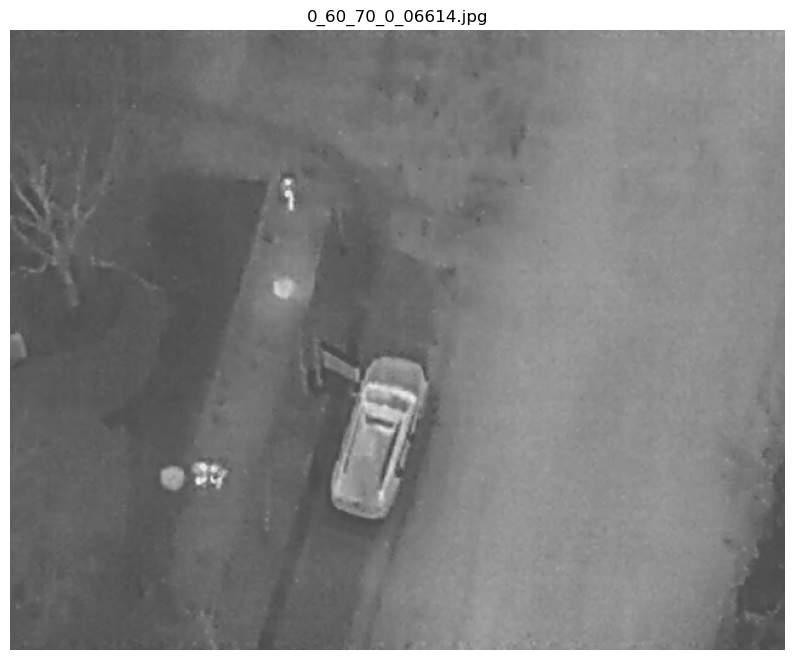

In [9]:
# example image
example_img = "0_60_70_0_06614.jpg"

fig = plt.figure(figsize=(10, 10))
e_img = cv2.imread(TEST_DIR + example_img)
plt.axis("off")
plt.imshow(e_img)
plt.title(example_img)
plt.show()

In [13]:
test_dirs = [TEST_DIR, TEST_DIR, "data/data_rotated/images/test/", "data/data_altitude/images/test/", "data/data_angle/images/test/"]

for i, d in enumerate(DIR_LIST):
    model = YOLO(d + "/weights/best.pt")
    results = model(test_dirs[i] + example_img, save=True)


image 1/1 /home/zuzgaw/uni/I/machine perception/thermal-segmentation/data/images/test/0_60_70_0_06614.jpg: 224x256 1 Person, 1 Car, 7.3ms
Speed: 0.5ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 224, 256)
Results saved to runs/detect/predict

image 1/1 /home/zuzgaw/uni/I/machine perception/thermal-segmentation/data/images/test/0_60_70_0_06614.jpg: 416x512 7.3ms
Speed: 1.4ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 512)
Results saved to runs/obb/predict

image 1/1 /home/zuzgaw/uni/I/machine perception/thermal-segmentation/data/data_rotated/images/test/0_60_70_0_06614.jpg: 416x512 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 512)
Results saved to runs/obb/predict2

image 1/1 /home/zuzgaw/uni/I/machine perception/thermal-segmentation/data/data_altitude/images/test/0_60_70_0_06614.jpg: 416x512 7.5ms
Speed: 1.1ms preprocess, 7.5ms inference, 1.5ms postprocess per image at s

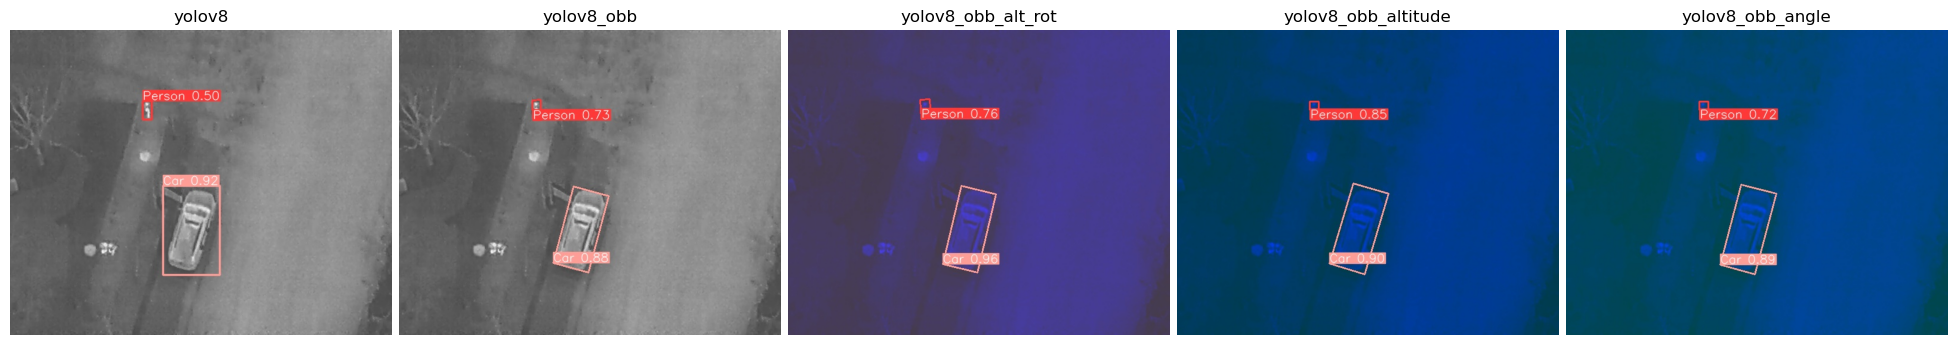

In [17]:
img_paths = ["runs/detect/predict/", "runs/obb/predict/", "runs/obb/predict2/", "runs/obb/predict3/", "runs/obb/predict4/"]

fig, axs = plt.subplots(1, 5, figsize=(25, 20))
plt.subplots_adjust(wspace=0.02)

for i, img_path in enumerate(img_paths):
    img = mpimg.imread(img_path + example_img)
    axs[i].imshow(img)
    axs[i].axis("off")
    axs[i].set_title(MODEL_LIST[i])

plt.show()